### Introduction

This notebook looks at the performance of food magazine Bon Appetit across the years.  

The magazine's performance can be measured by several indicators, such as the number of recipes published in a year, the number of reviews and ratings, and the average ratings of its recipes. 

Apart from the overall performance of the magazine, the performance of recipes and recipe developers/contributors is examined.

In [27]:
# import necessary pacakages
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
# import data
recipes = pd.read_pickle("recipes_processed.pkl")

# change column data types
recipes['rating'] = pd.to_numeric(recipes['rating'], errors='coerce')

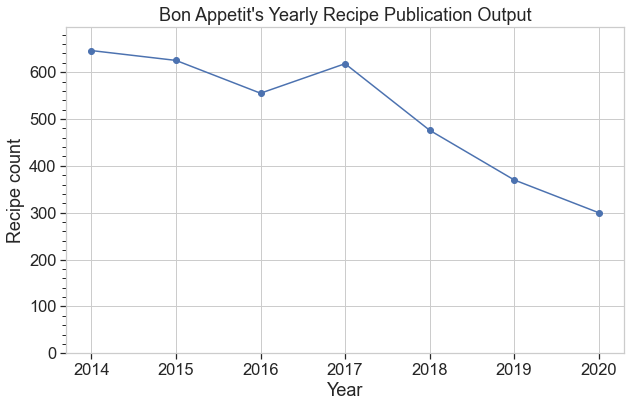

In [29]:
import matplotlib.ticker as ticker
# prepare dataframe in right format
recipes_grouped_y = recipes[(recipes['date_x']>'2013-12-31')&(recipes['date_x']<'2021-01-01') ].groupby(recipes.date_x.dt.year).size().to_frame().reset_index().rename(columns={'date_x':'year', 0: 'n_recipe'}).set_index('year')
# excluded years 2012,2013 and 2021 because of too few recipes

fig, ax = plt.subplots(figsize=(10,6))

ax.plot(recipes_grouped_y.index, recipes_grouped_y.n_recipe, marker='o')

ax.set(xlabel='Year', ylabel='Recipe count')
ax.set_title('Bon Appetit\'s Yearly Recipe Publication Output')

ax.set_ylim(0, recipes_grouped_y.n_recipe.max()+50)

ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())

ax.grid(True)

plt.show()

In [30]:
recipes[(recipes['date_x']>'2013-12-31')&(recipes['date_x']<'2021-01-01') ].groupby(recipes.date_x.dt.year.astype('Int64')).size().to_frame().reset_index().rename(columns={'date_x':'year', 0: 'n_recipe'}).set_index('year').pct_change()

,n_recipe
year,
2014,NaN
2015,-0.032508
2016,-0.112000
2017,0.113514
2018,-0.229773
2019,-0.222689
2020,-0.189189


Bon Appetit's recipe output peaked in 2014, and has gradually been declining since. Since 2021 has just started, it remains to be seen whether 2021 will see a further fall in new recipes published. 

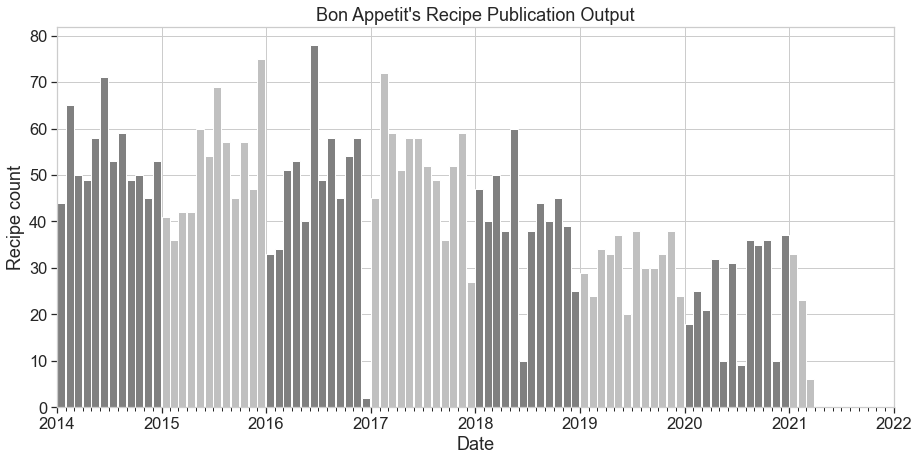

In [31]:
sns.set_style('whitegrid')

# turn on ticks because seaborn default is to turn it off
plt.rcParams.update({"xtick.bottom" : True, "ytick.left" : True})

import matplotlib.dates as mdates
years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter('%Y')

# prepare dataframe in right format
recipes_grouped = recipes[recipes['date_x']>'2013-12-31'].groupby(recipes.date_x.dt.to_period("M")).size().to_frame().reset_index().rename(columns={'date_x':'date', 0: 'n_recipe'}).set_index('date')

# determine best width for barplot
barwidth = np.min(np.diff(mdates.date2num(recipes_grouped.index.to_timestamp())))

fig, ax = plt.subplots(figsize=(15,7))

# create dictionary of colors for each year (alternating color scheme), might be better way to do this
colors = {2014: 'grey', 2015: 'silver', 2016: 'grey', 2017: 'silver', 2018: 'grey', 2019:'silver', 2020:'grey', 2021:'silver'}

ax.bar(recipes_grouped.index.to_timestamp(), recipes_grouped.n_recipe,
       width=barwidth,
       color= [colors[i] for i in recipes_grouped.index.to_timestamp().year],
       align='edge') # somehow periodindex doesnt work and has to be changed to timestamp
#recipes_grouped.plot(ax=ax)

ax.set(xlabel='Date', ylabel='Recipe count')
ax.set_title('Bon Appetit\'s Recipe Publication Output')

# format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(months)

# round to nearest years.
datemin = np.datetime64(recipes_grouped.index[0], 'Y')
datemax = np.datetime64(recipes_grouped.index[-1], 'Y') + np.timedelta64(1, 'Y')
ax.set_xlim(datemin, datemax)

ax.grid(True)

plt.show()

 In terms of monthly output, there are no discernible trends, possibly because the website puts out content regularly for its readers. 

In [32]:
# total number of recipes, reviews and ratings in each year
recipes.groupby(recipes.date_x.dt.year.astype('Int64')).agg({'title':['count'], 'review_count':['sum'], 'ratings_count': 'sum'})

,title,review_count,ratings_count
,count,sum,sum
date_x,,,
2012,8,8,295
2013,53,103,5997
2014,646,781,46351
2015,625,1004,22943
2016,555,1407,2723
2017,618,2926,5189
2018,476,5103,7297
2019,370,6234,9391


Since rating a recipe requires much less effort than writing a review, it's unsurprising that the total number of ratings are generally (much) higher than the total number of reviews in each year. 

What's interesting is that the total number of reviews has increased for newer recipes, despite a smaller output of recipes. This appears to show that reader engagement has increased over the years (assumption being that readers have always been able to review the recipes and all reviews have been kept).

Since the number of recipes published in each year differs, it's perhaps better to evaluate the number of reviews and ratings per recipe.

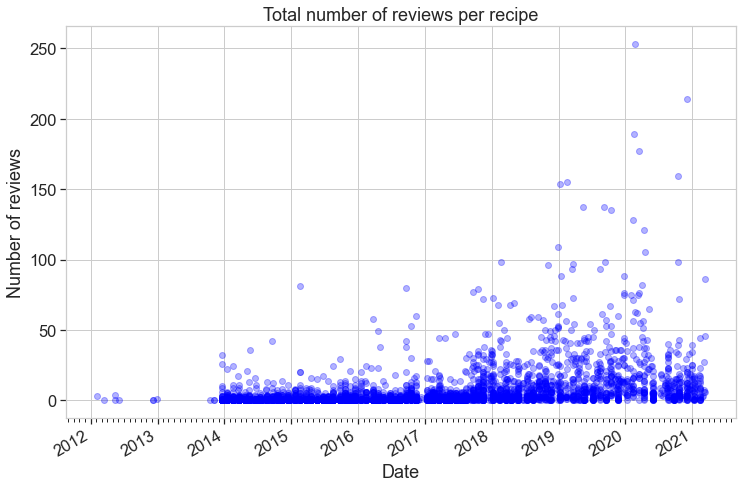

In [33]:
# total number of reviews written per recipe
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
sns.set(font_scale=1.5, style="whitegrid")

# turn on ticks because seaborn default is to turn it off
plt.rcParams.update({"xtick.bottom" : True, "ytick.left" : True})

fig, ax = plt.subplots(figsize=(12, 8))

ax.scatter(recipes.date_x,
           recipes['review_count'],
           color='blue', alpha=0.3)

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Number of reviews",
       title='Total number of reviews per recipe')

# Define the date format
date_form = DateFormatter("%Y")
ax.xaxis.set_major_formatter(date_form)


# Ensure a major tick for each year 
years = mdates.YearLocator()
ax.xaxis.set_major_locator(years)

# Ensure a minor tick for each month
months = mdates.MonthLocator(interval=1)
ax.xaxis.set_minor_locator(months)


# set font and rotation for date tick labels
fig.autofmt_xdate()


plt.show()

(0.0, 150.0)

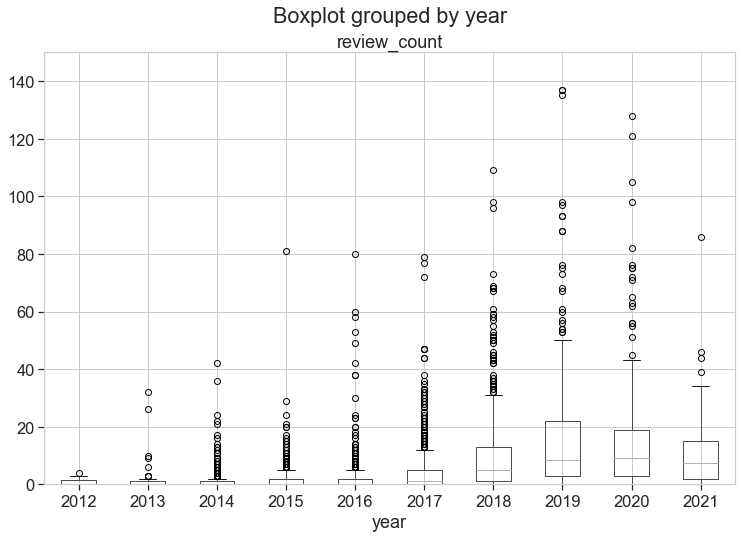

In [34]:
# create column for year of publication
recipes = recipes.assign(year = recipes.date_x.dt.year.astype('Int64'))

# plot boxplots for review_count by year column
recipes.boxplot(column='review_count', by='year', figsize=(12,8))
plt.ylim(0,150)

It looks like the number of reviews written per recipe has increased, compared to earlier years where more recipes went unreviewed.

It makes sense that recipes from before 2021 have more reviews since there has been more time for the reviews to accumulate. Bon Appetit also frequently does roundups of recipes, which directs more traffic to these less recent recipes. 

One limitation of my scraper was that it did not capture inidividual reviews and their dates so my dataset cannot provide a more detailed picture of the engagement with a particular recipe.

In [35]:
# average number of reviews per recipe per year (sum review counts/recipe count)
recipes.groupby(recipes.date_x.dt.year.astype('Int64')).apply(lambda x: x['review_count'].sum()/len(x))

date_x
2012     1.000000
2013     1.943396
2014     1.208978
2015     1.606400
2016     2.535135
2017     4.734628
2018    10.720588
2019    16.848649
2020    17.870000
2021    11.419355
dtype: float64

(0.0, 600.0)

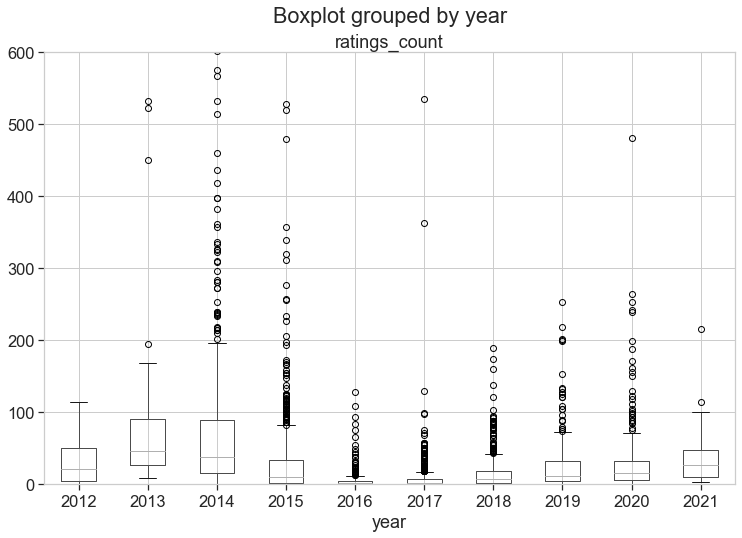

In [36]:
# plot boxplots for review_count by year column
recipes.boxplot(column='ratings_count', by='year', figsize=(12,8))
plt.ylim(0,600)

In [37]:
recipes.groupby(recipes.date_x.dt.year.astype('Int64')).apply(lambda x: x['ratings_count'].sum()/len(x))

date_x
2012     36.875000
2013    113.150943
2014     71.750774
2015     36.708800
2016      4.906306
2017      8.396440
2018     15.329832
2019     25.381081
2020     32.940000
2021     36.241935
dtype: float64

In [38]:
# plot bar chart comparing mean review and rating counts
# merge the two tables 
mean_n_reviews = recipes.groupby(recipes.date_x.dt.year.astype('Int64')).apply(lambda x: x['review_count'].sum()/len(x))
mean_n_ratings = recipes.groupby(recipes.date_x.dt.year.astype('Int64')).apply(lambda x: x['ratings_count'].sum()/len(x))
mean_r = pd.concat([mean_n_reviews, mean_n_ratings], axis=1).reset_index().rename(columns={'date_x': 'date', 0: 'n_review_avg', 1:'n_ratings_avg'}).set_index('date')

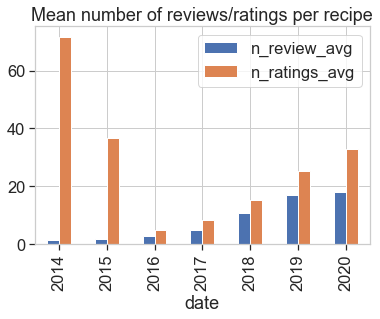

In [39]:
ax = mean_r.loc[2014:2020,].plot.bar() # remove years before 2014 and after 2020 because there are too few recipes
ax.set_title("Mean number of reviews/ratings per recipe")
plt.show()

### Top recipes

The performance of a recipe can be determined by its rating and reviews, including the number of ratings and reviews it gets.

In [40]:
# most reviewed recipes in each year
idx = recipes.groupby(recipes.date_x.dt.year.astype('Int64'))['review_count'].transform(max) == recipes['review_count']
recipes[idx].iloc[:,0:8].sort_values(by=['date_x'])

,title,author,date_x,ingredients,rating,ratings_count,review_count,tags
1552,Arugula and Roasted Chickpea Salad with Feta,The Bon Appétit Test Kitchen,2012-05-14,"[1, 12-ounce can chickpeas, rinsed, drained, d...",4.2,37,4,"[arugula, chickpea, salad, healthy, healthyish]"
1558,Chocolate Brownie Cookies,Alison Roman,2013-12-17,"[3, cups gluten-free powdered sugar, ¾, cup un...",3.6,1188,32,"[chocolate, cocoa, cookies, dessert, gluten fr..."
1603,Grandma-Style Pizza Dough,Alfia Muzio,2014-09-17,"[1, envelope active dry yeast (about 2¼ tsp.),...",3.9,358,42,"[bread, dough, italian, pizza]"
2532,Raspberry-Ricotta Cake,Alison Roman,2015-02-17,"[nonstick vegetable oil spray, 1½, cups all-pu...",3.7,1256,81,"[cake, dessert, fast easy fresh, raspberry, ri..."
4070,Fettuccine Alfredo,Carla Lalli Music,2016-09-21,"[12, ounces fettuccine or other long pasta, ko...",4.2,109,80,"[butter, cheese, fettuccine, parmesan, pasta]"
856,Broccoli Bolognese with Orecchiette,Adam Rapoport,2017-10-17,"[1, large head of broccoli (1¼–1½ pounds), cut...",4.6,99,79,"[weeknight, dinner, pasta, broccoli, garlic, s..."
602,Chicken and Rice Soup,Andy Baraghani,2018-12-26,"[¾, lb. skinless, boneless chicken thighs, ⅓, ...",4.7,138,109,"[soup, chicken recipes, rice, garlic, ginger, ..."
107,Chicken and Rice Soup with Garlicky Chile Oil,Kat Boytsova,2019-02-17,"[1, small onion, 6, garlic cloves, ⅔, cup whit...",4.7,202,155,"[soup, web recipe, basically, onion, garlic, r..."
79,Shockingly Easy No-Knead Focaccia,Sarah Jampel,2020-02-22,"[1, ¼-oz. envelope active dry yeast (about 2¼ ...",4.8,481,253,"[basically, basically baking, yeast, honey, fl..."
19,Roast Chicken,Claire Saffitz,2021-03-08,"[1, lemon, 1, head of garlic, ¼, cup (½ stick)...",4.9,216,86,"[web recipe, chicken recipes, roast chicken, l..."


Looking at a recipe's rating alone may not be sufficient as some recipes have more ratings than others. Assuming that a larger number of recipes makes recipes less skewed, I want to identify the top-rated recipes with more than 50 ratings.

In [41]:
recipes['rating'].where(recipes['ratings_count'].astype('Int64')>50).groupby(recipes.date_x.dt.year.astype('Int64')).max()

date_x
2012    4.0
2013    4.5
2014    4.5
2015    4.3
2016    4.8
2017    5.0
2018    5.0
2019    5.0
2020    4.9
2021    4.9
Name: rating, dtype: float64

In [43]:
rated_recipes = recipes[recipes['ratings_count']>50] # subset only recipes with >50 ratings
top_idx = rated_recipes.groupby(recipes.date_x.dt.year.astype('Int64'))['rating'].transform(max) == rated_recipes['rating']
rated_recipes.iloc[:,0:8][top_idx].sort_values(by=['date_x'])

,title,author,date_x,ingredients,rating,ratings_count,review_count,tags
1556,Kale Salad with Butternut Squash and Almonds,The Bon Appétit Test Kitchen,2012-02-02,"[8, tablespoons extra-virgin olive oil, 3, tab...",4.0,115,3,"[butternut squash, kale, salad, side, vegetari..."
1560,Charred Corn Salad with Basil and Tomatoes,The Bon Appétit Test Kitchen,2012-06-06,"[12, ears of corn, husked, 6, tablespoons oliv...",4.0,92,0,"[basil, corn, fourth of july, grilled vegetabl..."
1540,Toasted Spelt Soup with Escarole and White Beans,Dawn Perry,2013-12-17,"[1, medium onion, coarsely chopped, 1, small f...",4.5,91,1,"[cannellini beans, celery, escarole, farro, fe..."
4311,Brad’s Campsite Jambalaya,Zach DeSart,2014-04-22,"[2, tablespoons vegetable oil, 1½, pounds skin...",4.5,56,1,"[celery, parlsey, prep school, rice, sausage, ..."
2527,"Squid Ink Pasta with Shrimp, Nduja, and Tomato",Dawn Perry,2015-02-17,"[1, pound large head-on or shell-on shrimp, 3,...",4.3,59,5,"[linguine, pasta, shrimp, spicy, tomato]"
3851,BA’s Best Buttermilk Biscuits,Claire Saffitz,2016-03-22,"[2½, teaspoons baking powder, 2, teaspoons kos...",4.8,93,58,"[bake, biscuit, buttermilk]"
4061,Best Apple Pie,Claire Saffitz,2016-09-20,"[dough, 3½, cups all-purpose flour, 2, tablesp...",4.8,54,38,"[allspice, apple, apple cider, apple cider vin..."
3667,BA's Best Green Bean Casserole,Chris Morocco,2016-11-11,"[2, pounds green beans, kosher salt, 2, tables...",4.8,128,60,"[casserole, green bean, bean, mushroom, thyme,..."
1122,Posole Verde with Chicken,Chris Morocco,2017-02-22,"[¼, cup olive oil, 1, large yellow onion, chop...",5.0,51,21,"[healthyish, web recipe, posole, onion, garlic..."
661,Shrimp and Basil Stir-Fry,Andy Baraghani,2018-08-01,"[3, fresno chiles, coarsely chopped, 6, garlic...",5.0,77,59,"[web recipe, farmers market challenge, healthy..."


What makes a recipe perform better than others (with higher ratings and/or more reviews)? Possible factors include:
- Number of ingredients
- Types of ingredients  

I'll examine how the ingredient count relates to the rating and review count of a recipe.

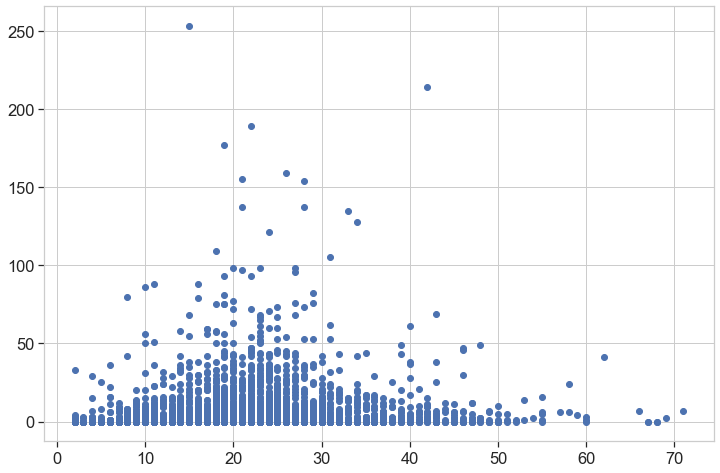

In [44]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.scatter(recipes['ingred_elem_count'],
           recipes['review_count'])

plt.show()

It looks like recipes with ~20 ingredients are more likely to have a higher review count than recipes with fewer or more ingredients. Let's plot a boxplot to examine this more closely.

(0.0, 100.0)

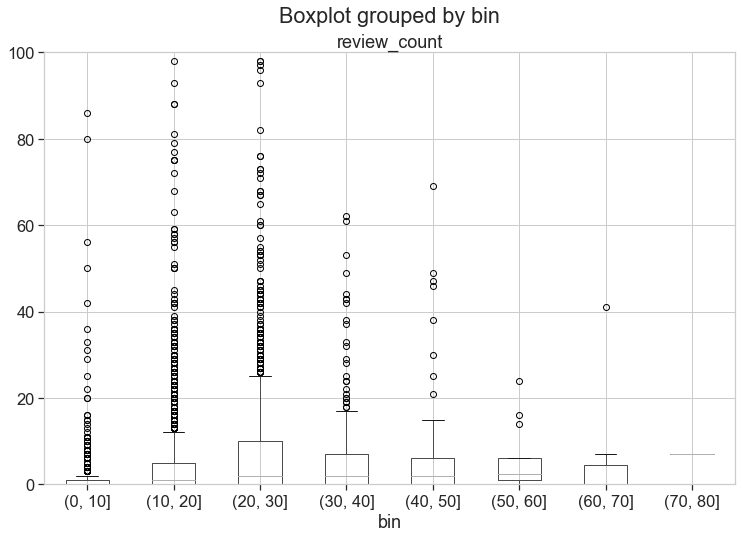

In [45]:
# assign each recipe to a manually defined bin according to the number of ingredients it contains
recipes['bin'] = pd.cut(recipes['ingred_elem_count'], [0,10,20,30,40,50,60,70,80]) 

# plot box plot
recipes.boxplot(column='review_count', by='bin', figsize=(12,8))
plt.ylim(0,100) # narrowed down y-axis limit because the outliers are occupying too much space

Possible reasons why ~20 ingredients is the 'sweet spot' for reviews. Recipes with too many ingredients may put people off from trying them hence resulting in fewer reviews. On the other hand, recipes with fewer than 20 ingredients are usually simpler/more straightforward and readers may not deem the recipes worth the effort of a review.  

Caveat: Due to the method used in counting the number of ingredients (see notebook 1), the estimated count (for all recipes) may be slightly overestimated. So in reality, the 'sweet spot' for the number of ingredients is probably ~5-10 fewer ingredients than the estimated ingredient count here.

### Contributors

In recent years, Bon Appetit's cast of editorial talent has come to define the magazine. I'm curious to see whether these writers has an effect on the reviews received.

In [46]:
# list all unique authors
print(f'Number of authors/contributors: {len(recipes.author.unique())}')

Number of authors/contributors: 547


547 is quite a large number of authors to look at. I'll start off by looking at the more well known contributors (i.e. the ones who have made an appearance on Bon Appetit's YouTube channel).

In [47]:
# top performing authors by output, average ratings received

# create list of authors who have appeared on the YouTube channel
ba_test_kitchen = ('Andy Baraghani', 'Brad Leone', 'Chris Morocco', 'Molly Baz', 'Christina Chaey', 'Alex Delany',
                   'Sohla El-Waylly', 'Priya Krishna', 'Rick Martinez', 'Carla Lalli Music', 'Claire Saffitz', 'Amiel Stanek')

# save subset of df containing recipes from these authors
ba_tk_recipes = recipes[recipes.author.str.contains('|'.join(ba_test_kitchen))]

# group by authors: agg functions: count recipes (title), mean rating, sum ratings count, review count
ba_tk_recipes.groupby('author').agg({'title': 'count',
                                    'rating': 'mean',
                                    'review_count': 'sum'})

,title,rating,review_count
author,,,
Alex Delany,2,3.900000,5
Amiel Stanek,14,4.400000,75
Andy Baraghani,300,4.534008,3337
Brad Leone,26,4.041667,106
Brad Leone & Chris Morocco,1,4.700000,2
Carla Lalli Music,58,4.547170,770
Chris Morocco,364,4.393312,3225
Christina Chaey,11,4.636364,210
Claire Saffitz,434,4.236176,3528


It looks like not all the Test Kitchen cast are recipe developers, which makes sense since they probably have other job roles within the magazine. So it may make more sense to look at who develops the most recipes.

In [48]:
# who are the most prolific contributors?
recipes.groupby('author').size().nlargest(15)

author
Claire Saffitz                  434
Chris Morocco                   364
Andy Baraghani                  300
Alison Roman                    274
Condé Nast                      174
Rick Martinez                   106
Molly Baz                       101
Dawn Perry                       75
Carla Lalli Music                58
Sarah Jampel                     47
Bon Appétit                      38
Anna Stockwell                   34
Sohla El-Waylly                  33
Kat Boytsova                     29
The Bon Appétit Test Kitchen     27
dtype: int64

In terms of number of recipes developed, Claire Saffitz, Chris Morocco, Andy Baraghani and Alison Roman have contributed the most (>250 recipes). But who has the highest mean rating per recipe?

In [49]:
prolific = list(recipes.groupby('author').size().nlargest(15).index)

# save subset of df containing recipes from these authors
prolific_authors_recipes = recipes[recipes.author.isin(prolific)]

# group by authors: agg functions: count recipes (title), mean rating, sum ratings count, review count
prolific_authors_recipes.groupby('author').agg({'title': ['count'],
                                    'rating': ['mean'],
                                    'review_count': ['sum']})

,title,rating,review_count
,count,mean,sum
author,,,
Alison Roman,274,-8.196400,645
Andy Baraghani,300,4.534008,3337
Anna Stockwell,34,4.516000,239
Bon Appétit,38,3.820588,41
Carla Lalli Music,58,4.547170,770
Chris Morocco,364,4.393312,3225
Claire Saffitz,434,4.236176,3528
Condé Nast,174,4.286154,529


It seems like there's an error in the dataset where a recipe's rating is negative (see Alison Roman). This needs to be removed before the true mean rating can be determined for Alison Roman.

In [50]:
recipes[(recipes.author.str.contains('Alison Roman')) & (recipes['rating']<0)]

,title,author,date_x,ingredients,rating,ratings_count,review_count,tags,url,tags_count,...,worcestershire sauce,yam,yeast,yogurt,yukon gold,yuzu,ziti,zucchini,year,bin
2239,Lemon Verbena Sugar,Alison Roman,2015-07-21,"[6, sprigs dried lemon verbena, 2, cups sugar]",-3019.3,4,0,"[lemon verbena, sugar]",https://www.bonappetit.com/recipe/lemon-verben...,2,...,0,0,0,0,0,0,0,0,2015,"(0, 10]"


In [51]:
# drop the recipe based on its index
recipes.drop([2239,1], inplace=True)

# save subset of df containing recipes from these authors
prolific_authors_recipes = recipes[recipes.author.isin(prolific)]

# group by authors: agg functions: count recipes (title), mean rating, sum ratings count, review count
prolific_authors_recipes.groupby('author').agg({'title': ['count'],
                                                'rating': ['mean'],
                                                'review_count': ['sum']})

,title,rating,review_count
,count,mean,sum
author,,,
Alison Roman,273,3.896386,645
Andy Baraghani,300,4.534008,3337
Anna Stockwell,34,4.516000,239
Bon Appétit,38,3.820588,41
Carla Lalli Music,58,4.547170,770
Chris Morocco,364,4.393312,3225
Claire Saffitz,434,4.236176,3528
Condé Nast,174,4.286154,529


In [52]:
# sort output by mean rating
top_contrib = prolific_authors_recipes.groupby('author').agg({'title': 'count',
                                                'rating': 'mean',
                                                'review_count': 'sum'})

top_contrib.reset_index().sort_values(['rating'], ascending=False).set_index(['author'])

,title,rating,review_count
author,,,
Sarah Jampel,47,4.572340,1516
Carla Lalli Music,58,4.547170,770
Andy Baraghani,300,4.534008,3337
Molly Baz,101,4.523711,2268
Anna Stockwell,34,4.516000,239
Chris Morocco,364,4.393312,3225
Sohla El-Waylly,33,4.369697,721
Kat Boytsova,29,4.344444,635
Condé Nast,174,4.286154,529


If contributors were evaluated based on how highly their recipes were rated, those contributors with more recipes may be penalised since not all their recipes may perform that well. Nonetheless, the most prolific contributors (>250 recipes) generally still have a mean rating of above 4, with the exception of Alison Roman.

### Conclusion

#### Main findings
- Bon Appetit has been producing fewer recipes each year, with output falling by ~10-20% each year.
- Despite slowing output, the magazine's website has greater engagement with its readers, as seen from the increasing mean review and ratings count from 2015 onwards.
- Although BA's Test Kitchen on YouTube has made audiences familiar with a cast of employees, not all of the cast actually contribute to recipes on the website.  
- Recipes with ~20 ingredients are more likely to garner a higher number of reviews compared to recipes with fewer or more ingredients.

#### Future extensions
- Extend web scraper to scrape the individual reviews.
- Regression model to predict the performance of a recipe based on its attributes (author, type of ingredients?)
- This analysis focused mainly on Bon Appetit's online recipe catalog. However, Bon Appetit has been expanding its digital presence on other platforms, notably YouTube, which may also be interesting to look at.